In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the dataset directory
dataset_dir = "/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/"

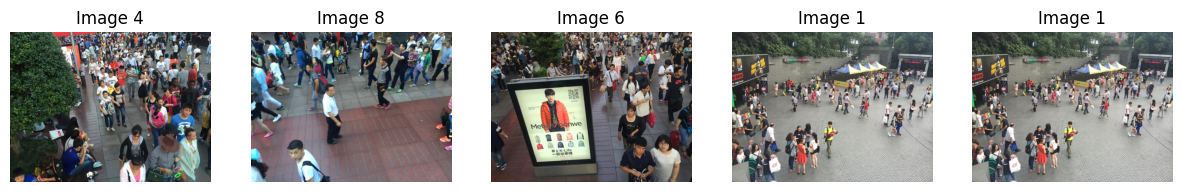

In [ ]:
# Load image filenames
image_filenames = os.listdir(dataset_dir)

# Load images and calculate basic statistics
image_dimensions = []
for filename in image_filenames:
    image_path = os.path.join(dataset_dir, filename)
    image = Image.open(image_path)
    width, height = image.size
    image_dimensions.append((width, height))

# Convert to numpy array for easier analysis
image_dimensions = np.array(image_dimensions)

# Calculate basic statistics
num_images = len(image_dimensions)
mean_width = np.mean(image_dimensions[:, 0])
mean_height = np.mean(image_dimensions[:, 1])
stddev_width = np.std(image_dimensions[:, 0])
stddev_height = np.std(image_dimensions[:, 1])

# Display sample images
num_samples = 5
sample_indices = np.random.randint(0, num_images, num_samples)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    image_path = os.path.join(dataset_dir, image_filenames[idx])
    image = Image.open(image_path)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.title(f"Image {idx}")
    plt.axis('off')
plt.show()





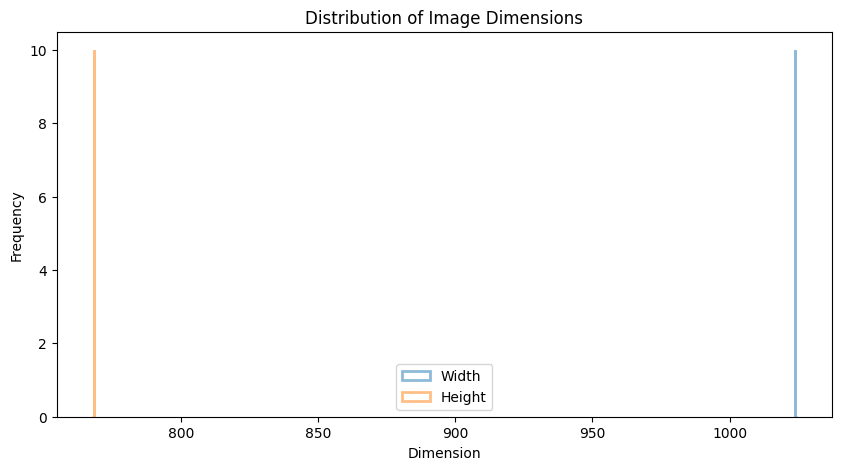

In [ ]:
# Histogram of image widths and heights
plt.figure(figsize=(10, 5))
plt.hist(image_dimensions[:, 0], bins=20, alpha=0.5, label='Width', histtype='step', linewidth=2)
plt.hist(image_dimensions[:, 1], bins=20, alpha=0.5, label='Height', histtype='step', linewidth=2)
plt.xlabel("Dimension")
plt.ylabel("Frequency")
plt.title("Distribution of Image Dimensions")
plt.legend()
plt.show()


In [ ]:
'''This cell shows the general details of the images like niumber of images,mean width,mean height,standard deviation of width,standard deviation of height'''

# Print basic statistics
print(f"Number of images: {num_images}")
print(f"Mean width: {mean_width:.2f}, Mean height: {mean_height:.2f}")
print(f"Standard deviation of width: {stddev_width:.2f}, Standard deviation of height: {stddev_height:.2f}")

Number of images: 10
Mean width: 1024.00, Mean height: 768.00
Standard deviation of width: 0.00, Standard deviation of height: 0.00


In [ ]:
'''This cell shows the mean aspect ratio and standard deviation of the aspect ratio of the images'''

aspect_ratios = image_dimensions[:, 1] / image_dimensions[:, 0]
mean_aspect_ratio = np.mean(aspect_ratios)
stddev_aspect_ratio = np.std(aspect_ratios)

print(f"Mean aspect ratio: {mean_aspect_ratio:.2f}")
print(f"Standard deviation of aspect ratio: {stddev_aspect_ratio:.2f}")


Mean aspect ratio: 0.75
Standard deviation of aspect ratio: 0.00


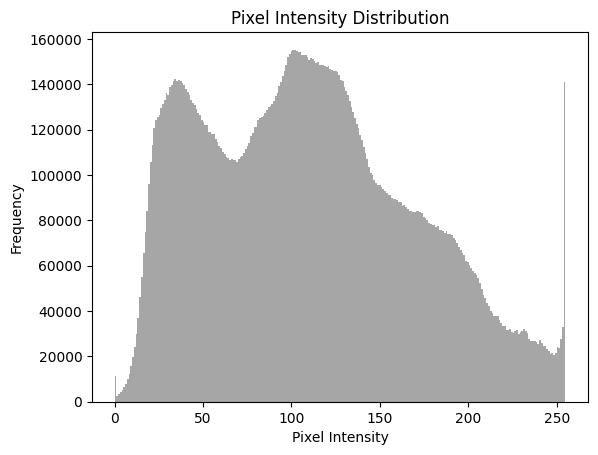

In [ ]:
# Calculate and plot pixel intensity distribution
pixel_values = np.array([np.array(Image.open(os.path.join(dataset_dir, filename))) for filename in image_filenames])
pixel_values_flat = pixel_values.flatten()
plt.hist(pixel_values_flat, bins=256, alpha=0.7, color='gray')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()


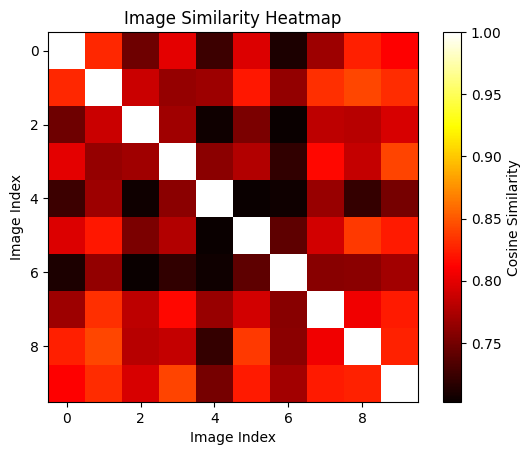

In [ ]:
# Calculate similarity matrix between images
from sklearn.metrics.pairwise import cosine_similarity

pixel_values_flatten = pixel_values.reshape((len(image_filenames), -1))

# Calculate cosine similarity
similarity_matrix = cosine_similarity(pixel_values_flatten)

plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.title("Image Similarity Heatmap")
plt.colorbar(label="Cosine Similarity")
plt.xlabel("Image Index")
plt.ylabel("Image Index")
plt.show()


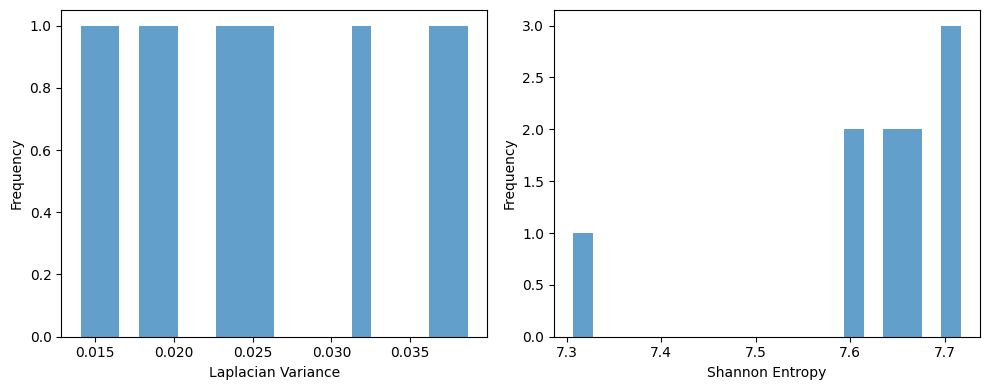

In [ ]:
'''
Laplacian Variance:
it measures the variance (or spread) of the second derivative of an image. In simpler terms, it
 quantifies the amount of rapid intensity changes (edges) in an image. The Laplacian operator is a mathematical filter that highlights regions
 of an image where the intensity changes rapidly, such as edges or fine details.
Usage in Image Quality Assessment: In image quality assessment, Laplacian variance is often used as a metric to evaluate the sharpness and clarity
of an image. Images with higher Laplacian variance generally have more pronounced edges and fine details, indicating better focus and image quality.
 Blurry or out-of-focus images tend to have lower Laplacian variance because the intensity changes are not as abrupt.

Shannon Entropy:

 it measure the amount of uncertainty or randomness in a signal. In the
context of images, it quantifies the diversity or complexity of pixel values. High entropy indicates a wide range of pixel values, while low
entropy indicates more uniform pixel values.
Usage in Image Quality Assessment:
 In image quality assessment, Shannon entropy can be used to evaluate the amount of information or texture
present in an image. Images with high entropy are often considered more visually interesting and complex, as they contain a greater diversity
of pixel values. Low-entropy images might appear smoother or less textured. However, in some cases, excessively high entropy might indicate
noise or artifacts rather than genuine detail.'''


import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.filters import laplace
from skimage.measure import shannon_entropy

dataset_dir = "/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/"

image_filenames = os.listdir(dataset_dir)

images = [np.array(Image.open(os.path.join(dataset_dir, filename))) for filename in image_filenames]

sharpness_metrics = []
for image in images:
    # Calculate Laplacian sharpness metric
    laplacian = laplace(image)
    laplacian_variance = np.var(laplacian)

    # Calculate Shannon entropy as an alternative sharpness metric
    entropy = shannon_entropy(image)

    sharpness_metrics.append((laplacian_variance, entropy))

sharpness_metrics = np.array(sharpness_metrics)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(sharpness_metrics[:, 0], bins=20, alpha=0.7)
plt.xlabel("Laplacian Variance")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(sharpness_metrics[:, 1], bins=20, alpha=0.7)
plt.xlabel("Shannon Entropy")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


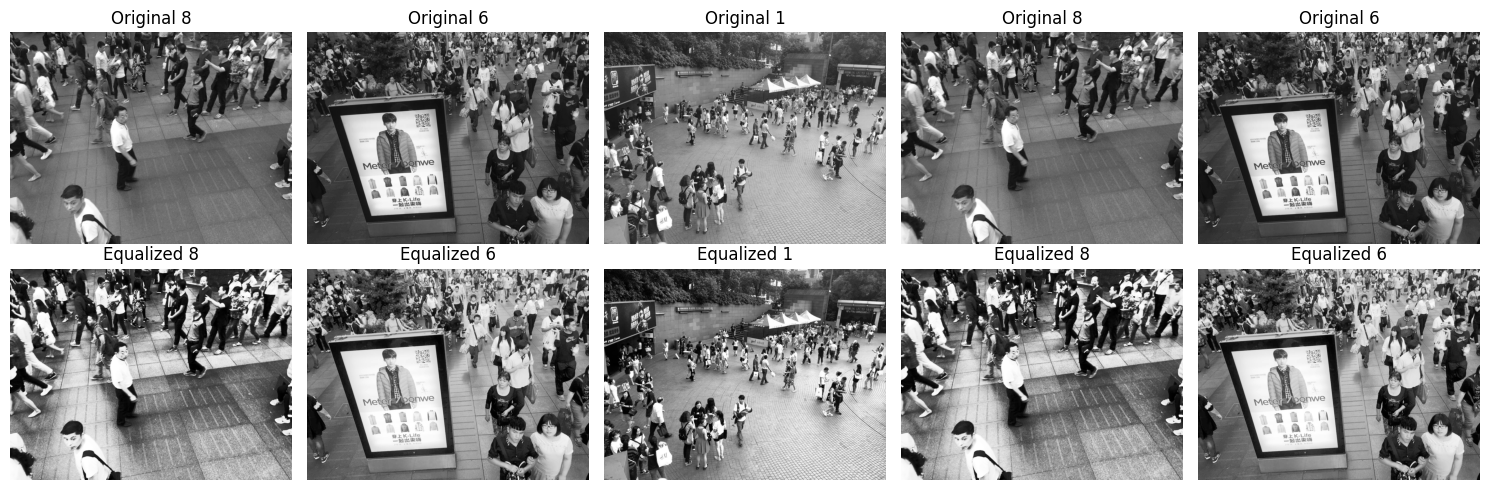

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure

dataset_dir = "/content/drive/MyDrive/ShanghaiTech/part_B/train_data/images/"

image_filenames = os.listdir(dataset_dir)

# Load images as arrays
images = [np.array(Image.open(os.path.join(dataset_dir, filename)).convert('L')) for filename in image_filenames]

# Apply histogram equalization to each image
equalized_images = [exposure.equalize_hist(image) for image in images]

# Visualize original and equalized images
num_samples = 5
sample_indices = np.random.randint(0, len(images), num_samples)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"Original {idx}")
    plt.axis('off')

    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(equalized_images[idx], cmap='gray')
    plt.title(f"Equalized {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()


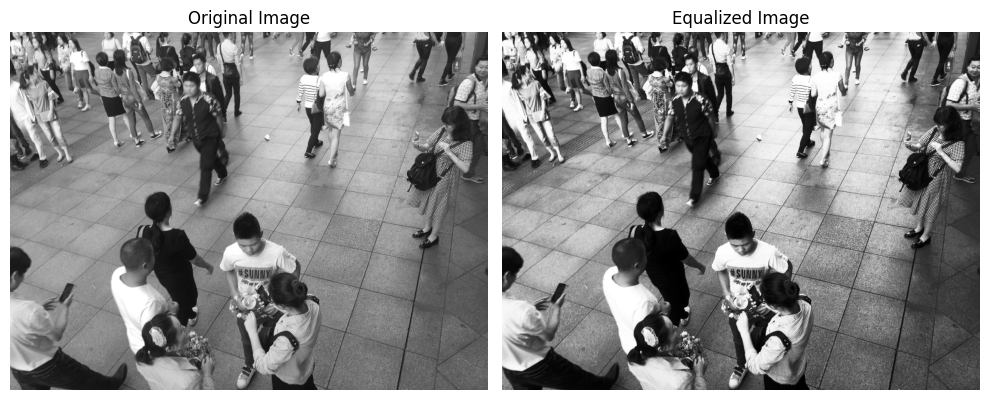

In [ ]:
import cv2
import matplotlib.pyplot as plt


# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()
